## Proximal Policy Optimazation: PPO  in cartpole

In [1]:
import gym

# 定义环境
class MyWrapper(gym.Wrapper):
  def __init__(self):
    env = gym.make('CartPole-v1', render_mode='rgb_array')
    super().__init__(env)
    self.env = env
    self.step_n = 0
  
  def reset(self):
    state, _ = self.env.reset()
    self.step_n = 0
    return state
    
  def step(self, action):
    state, reward, terminated, truncated, info = self.env.step(action)
    done = terminated or truncated
    self.step_n += 1
    if self.step_n >= 200:
      done = True
    return state, reward, done, info 
  
env = MyWrapper()
env.reset()

array([-0.02914667, -0.04055847,  0.01314181,  0.01421572], dtype=float32)

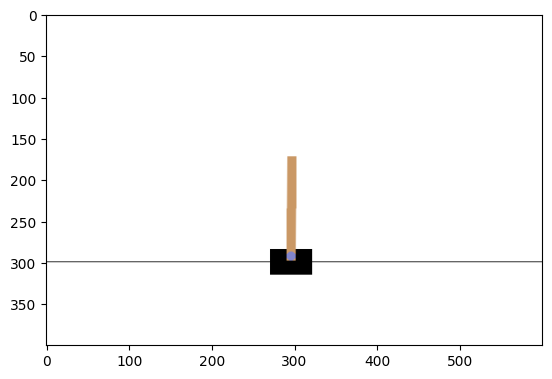

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

# 打印游戏
def show():
  plt.imshow(env.render())
  plt.show()
  
show()

In [3]:
import torch

# 定义模型
model = torch.nn.Sequential(
  torch.nn.Linear(4, 128),
  torch.nn.ReLU(),
  torch.nn.Linear(128, 2),
  torch.nn.Softmax(dim=1),
)

model_td = sequential = torch.nn.Sequential(
  torch.nn.Linear(4, 128),
  torch.nn.ReLU(),
  torch.nn.Linear(128, 1)
)

model(torch.randn(2, 4)), model_td(torch.randn(2, 4))

(tensor([[0.5557, 0.4443],
         [0.4693, 0.5307]], grad_fn=<SoftmaxBackward0>),
 tensor([[ 0.0181],
         [-0.0385]], grad_fn=<AddmmBackward0>))

In [4]:
import random

# 得到一个动作
def get_action(state):
  # 走神经网络，得到一个动作
  state = torch.FloatTensor(state).reshape(1, 4)

  # [1, 4] -> [1, 2]
  prob = model(state)
  
  # 根据概率选择一个动作
  action = random.choices(range(2), weights=prob[0].tolist(), k=1)[0]
  
  return action

get_action([1, 2, 3, 4])

0

In [5]:
# 得到一局游戏的数据
def get_data():
  states = []
  rewards = []
  actions = []
  next_states = []
  overs = []
  
  
  # 初始化游戏
  state = env.reset()
  
  # 玩到游戏结束为止
  over = False
  while not over:
    # 根据当前状态得到一个动作
    action = get_action(state)
    
    # 执行动作，得到反馈
    next_state, reward, over, _ = env.step(action)
    
    # 记录数据样本
    states.append(state)
    rewards.append(reward)
    actions.append(action)
    next_states.append(next_state)
    overs.append(over)
    
    # 更新游戏状态，开始下一个动作
    state = next_state
    
  # [b, 4]
  states = torch.FloatTensor(states).reshape(-1, 4)
  # [b, 1]
  rewards = torch.FloatTensor(rewards).reshape(-1, 1)
  # [b, 1]
  actions = torch.LongTensor(actions).reshape(-1, 1)
  # [b, 4]
  next_states = torch.FloatTensor(next_states).reshape(-1, 4)
  # [b, 1]
  overs = torch.LongTensor(overs).reshape(-1, 1)
  
  return states, rewards, actions, next_states, overs

get_data()

C:\Users\fanyu\AppData\Local\Temp\ipykernel_32228\619186310.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:204.)
  states = torch.FloatTensor(states).reshape(-1, 4)


(tensor([[ 0.0094, -0.0464,  0.0156,  0.0196],
         [ 0.0085, -0.2417,  0.0160,  0.3172],
         [ 0.0037, -0.0468,  0.0223,  0.0296],
         [ 0.0028,  0.1480,  0.0229, -0.2560],
         [ 0.0057,  0.3428,  0.0178, -0.5414],
         [ 0.0126,  0.5376,  0.0070, -0.8284],
         [ 0.0233,  0.3424, -0.0096, -0.5335],
         [ 0.0302,  0.1474, -0.0202, -0.2438],
         [ 0.0331,  0.3428, -0.0251, -0.5428],
         [ 0.0400,  0.1481, -0.0360, -0.2582],
         [ 0.0429, -0.0465, -0.0411,  0.0229],
         [ 0.0420,  0.1492, -0.0407, -0.2824],
         [ 0.0450,  0.3448, -0.0463, -0.5877],
         [ 0.0519,  0.1504, -0.0581, -0.3099],
         [ 0.0549, -0.0438, -0.0643, -0.0361],
         [ 0.0540,  0.1521, -0.0650, -0.3484],
         [ 0.0571, -0.0420, -0.0720, -0.0769],
         [ 0.0562,  0.1541, -0.0735, -0.3914],
         [ 0.0593, -0.0399, -0.0813, -0.1228],
         [ 0.0585,  0.1563, -0.0838, -0.4400],
         [ 0.0616,  0.3525, -0.0926, -0.7578],
         [ 0.

In [6]:
from IPython import display

def test(play):
  #初始化游戏
  state = env.reset()
  
  #记录反馈值的和,这个值越大越好
  reward_sum = 0
  
  #玩到游戏结束为止
  over = False
  while not over:
    #根据当前状态得到一个动作
    action = get_action(state)
    
    #执行动作,得到反馈
    state, reward, over, _ = env.step(action)
    reward_sum += reward
    
    # 打印动画
    if play and random.random() < 0.2: # 跳帧
      display.clear_output(wait=True)
      show()
      
  return reward_sum

test(play=False)

13.0

In [7]:
# 优势函数
def get_advantages(deltas):
  advantages = []
  
  # 反向遍历deltas
  s = 0.0
  for delta in deltas[::-1]:
    s = 0.98 * 0.95 * s + delta
    advantages.append(s)
    
  # 逆序
  advantages.reverse()
  return advantages

get_advantages(range(5))

[8.090483997483998, 8.690100963999999, 8.260044, 6.724, 4.0]

In [ ]:
def train():
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  optimizer_td = torch.optim.Adam(model_td.parameters(), lr=1e-2)
  loss_fn = torch.nn.MSELoss()
  
  # 玩N局游戏，每句游戏训练一次
  for epoch in range(500):
    # 玩一局游戏，得到数据
    # states -> [b, 4]
    # rewards -> [b, 1]
    # actions -> [b, 1]
    # next_states -> [b, 4]
    # overs -> [b, 1]
    states, rewards, actions, next_states, overs = get_data()
    
    # 计算values, targets
    # [b, 4] -> [b, 1]
    values = model_td(states)
    
    "code change here"
    # [b, 4] -> [b, 1]
    targets = model_td(next_states).detach()
    targets = targets * 0.98
    targets *= (1 - overs)
    targets += rewards
    
    # 计算优势,这里的advantages有点像是策略梯度里的reward_sum
    # 只是这里计算的不是reward,而是target和value的差
    # [b, 1]
    deltas = (targets - values).squeeze(dim=1).tolist()
    advantages = get_advantages(deltas)
    advantages = torch.FloatTensor(advantages).reshape(-1, 1)
    
    # 取出每步动作的概率
    # [b, 2] -> [b, 2] -> [b, 1]
    old_probs = model(states)
    old_probs = old_probs.gather(dim=1, index=actions)
    old_probs = old_probs.detach()
    
    # 每个批量反复训练10次
    for _ in range(10):
      #重新计算每一步动作的概率
      #[b, 4] -> [b, 2]
      new_probs = model(states)
      # [b, 2] -> [b, 1]
      new_probs = new_probs.gather(dim=1, index=actions)
      new_probs = new_probs
      
      # 求出概率变化
      # [b, 1] - [b, 1] -> [b, 1]
      ratios = new_probs / old_probs
      
      # 计算截断和不接段的两份loss, 取小的
      # [b, 1] * [b, 1] -> [b, 1]
      surr1 = ratios * advantages
      # [b, 1] * [b, 1] -> [b, 1]
      surr2 = torch.clamp(ratios, 0.8, 1.2) * advantages
      
      loss = -torch.min(surr1, surr2)
      loss = loss.mean()
      
      # 重新计算value和时序差分
      values = model_td(states)
      loss_td = loss_fn(values, targets)
      
      # 更新参数
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      optimizer_td.zero_grad()
      loss_td.backward()
      optimizer_td.step()
      
    if epoch % 50 == 0:
      test_result = sum([test(play=False) for _ in range(10)]) / 10
      print(epoch, test_result)
      
train()

0 20.3
50 143.7
100 200.0
150 200.0
200 200.0
250 200.0
300 200.0
350 200.0
400 200.0
450 200.0
500 200.0
550 200.0
600 200.0
650 200.0
700 200.0
750 200.0
800 200.0
850 200.0
900 200.0
950 200.0


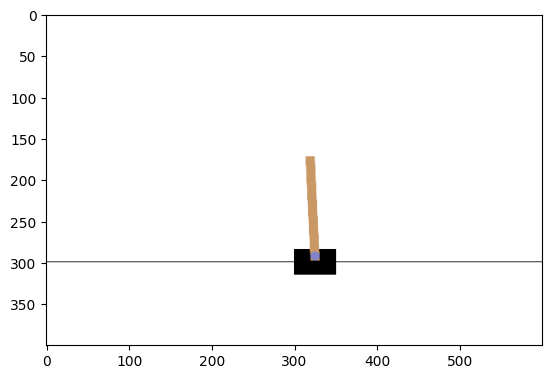

200.0

In [9]:
test(play=True)